In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns

# Dataset Information
The datasets used in this analysis were obtained by web-scraping a platform for home rentals (spotahome) for all available listings for the city of Barcelona, Spain. The datasets can be found at [https://github.com/camilababo/Pyhton-Automation-Projects/tree/master/Web_Scrapping](https://github.com/camilababo/Pyhton-Automation-Projects/tree/master/Web_Scrapping).

The original datasets were:
- ['clean_data.csv'](https://github.com/camilababo/Pyhton-Automation-Projects/blob/master/Web_Scrapping/clean_data.csv): Containing properties' details such as: ad reference number, city, type of property, soonest availability, rental price, rental information, ad title, link to the ad and neighbourhood.
- ['rental_features.csv'](https://github.com/camilababo/Pyhton-Automation-Projects/blob/master/Web_Scrapping/rental_features.csv): Containing properties' features such as: number of bedrooms, number of bathrooms, number of flatmates and area (square meters).

A dataset combining both can be found as ['barcelona_rental_data.csv'](https://github.com/camilababo/Pyhton-Automation-Projects/blob/master/Web_Scrapping/barcelona_rental_data.csv).

The scripts [explore_city_rental_prices.py](https://github.com/camilababo/Pyhton-Automation-Projects/blob/master/Web_Scrapping/explore_city_rental_prices.py) can be used to extract similar information on other cities with properties available in spotahome.

# Data Processing
Reading and joining both datastets: (1) Ads details and (2) Property details.

In [ ]:
property_data = pd.read_csv('clean_data.csv', sep=';', encoding='latin1', index_col=0)
property_data.head()

In [171]:
print(f' Original length: {len(property_data)}.')
property_data = property_data.drop_duplicates()
print(f'Length after removing duplicates: {len(property_data)}.')

 Original length: 5742.
Length after removing duplicates: 5742.


In [172]:
property_features = pd.read_csv('rental_features.csv', sep=',')
#property_features.head()

In [173]:
print(f' Original length: {len(property_features)}.')
property_features = property_features.drop_duplicates()
print(f'Length after removing duplicates: {len(property_features)}.')

 Original length: 6544.
Length after removing duplicates: 5735.


In [174]:
merged_df = pd.merge(property_data, property_features, on='Reference Number', how='inner')

In [175]:
def calculate_price_average(row):
    prices = str(row['Price']).split('-')
    prices = [int(price) for price in prices]
    return int(sum(prices) / len(prices))

merged_df['Average Price'] = merged_df.apply(calculate_price_average, axis=1)
merged_df.to_csv('barcelona_rental_data.csv', index=False, encoding='latin1')

# Exploratory Analysis

In [210]:
bcn_rent_df = pd.read_csv('barcelona_rental_data.csv', sep=',', encoding='Latin1')
bcn_rent_df.replace('No info', np.nan, inplace=True)
bcn_rent_df.head()

,Reference Number,City,House Type,Available From,Price,Additional Info,Ad Title,Link,Specific Location,Bedrooms,Flatmates,Bathrooms,Area,Average Price
0,893996,barcelona,Apartment,From 29 April,3040,bills included,3-bedroom apartment for rent in Sant Gervasi B...,https://www.spotahome.com/barcelona/for-rent:a...,Sant Gervasi,3,NaN,2,110,3040
1,480286,barcelona,Room,From 3 July,699,instant booking,Rooms for rent in 7-bedroom apartment in Barce...,https://www.spotahome.com/barcelona/for-rent:r...,Barcelona,NaN,7,5,160,699
2,1091471,barcelona,Room,From 2 March,630,instant booking,Rooms for rent in shared 6-bedroom apartment i...,https://www.spotahome.com/barcelona/for-rent:r...,Ciutat Vella,NaN,6,1,100,630
3,1091473,barcelona,Room,From 2 March,590,instant booking,Rooms for rent in shared 6-bedroom apartment i...,https://www.spotahome.com/barcelona/for-rent:r...,Ciutat Vella,NaN,6,1,100,590
4,573720,barcelona,Room,From 1 July,580,bills included,Rooms for rent in 25-bedroom house in Bellater...,https://www.spotahome.com/barcelona/for-rent:r...,Bellaterra,NaN,20,15,1000,580


In [197]:
print(f'The total number of properties available for rent in Barcelona, through the spotahome website is: {len(bcn_rent_df)}.')

The total number of properties available for rent in Barcelona, through the spotahome website is: 5735.


In [267]:
min_price =  bcn_rent_df['Average Price'].min()
max_price =  bcn_rent_df['Average Price'].max()
mean_price = bcn_rent_df['Average Price'].mean()
print(f'The mean of rental prices is {mean_price:.2f}€, with a range of {min_price}€ to {max_price}€.')

The mean of rental prices is 1415.98€, with a range of 260€ to 115000€.


In [199]:
max_rent = bcn_rent_df[bcn_rent_df['Average Price'] == 115000.0]
max_rent

,Reference Number,City,House Type,Available From,Price,Additional Info,Ad Title,Link,Specific Location,Bedrooms,Flatmates,Bathrooms,Area,Average Price
5690,206940,barcelona,Studio,From 2 January 2025,115000,some bills included,Spacious studio apartment for rent in Nou Barr...,https://www.spotahome.com/barcelona/for-rent:s...,Nou Barris,NaN,NaN,1,30,115000


OBS.: Property ref.206940 probably constitutes a data entry error, given that it shows a monthly price of 115.000€ for a 30m2 studio. As such it will be removed from the dataset.

In [275]:
bcn_rent_df.drop(index=5690, inplace=True)

In [268]:
min_price =  bcn_rent_df['Average Price'].min()
max_price =  bcn_rent_df['Average Price'].max()
mean_price = bcn_rent_df['Average Price'].mean()
print(f'The mean of rental prices is {mean_price:.2f}€, with a range of {min_price}€ to {max_price}€.')

The mean of rental prices is 1415.98€, with a range of 260€ to 115000€.


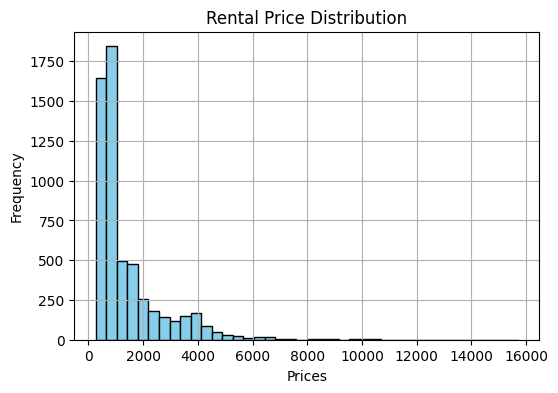

In [202]:
plt.figure(figsize=(6, 4))
plt.hist(bcn_rent_df['Average Price'], bins=40, color='skyblue', edgecolor='black')
plt.xlabel('Prices')
plt.ylabel('Frequency')
plt.title('Rental Price Distribution')
plt.grid(True)
plt.show()

In [215]:
area_int = bcn_rent_df['Area'].dropna().astype(int)
area_summary = area_int.describe()
area_summary

count    4047.000000
mean      110.988386
std        93.248922
min         1.000000
25%        65.000000
50%        90.000000
75%       130.000000
max      1000.000000
Name: Area, dtype: float64

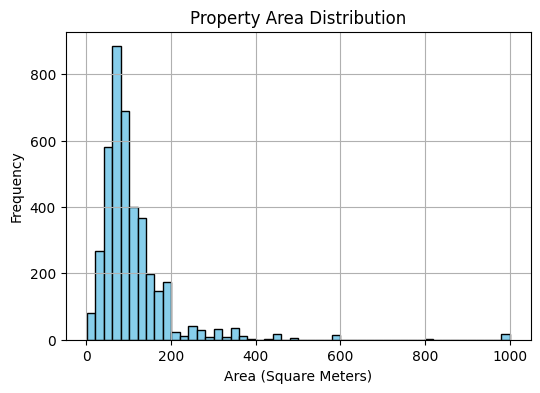

In [219]:
plt.figure(figsize=(6, 4))
plt.hist(area_int, bins=50, color='skyblue', edgecolor='black')
plt.xlabel('Area (Square Meters)')
plt.ylabel('Frequency')
plt.title('Property Area Distribution')
plt.grid(True)
plt.show()

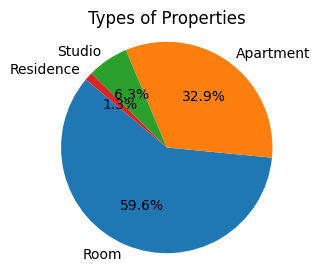

In [183]:
counts = bcn_rent_df['House Type'].value_counts()
plt.figure(figsize=(3, 3))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Types of Properties')
plt.axis('equal')
plt.show()

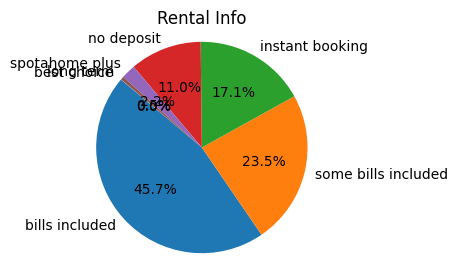

In [184]:
counts = bcn_rent_df['Additional Info'].value_counts()
plt.figure(figsize=(3, 3))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Rental Info')
plt.axis('equal')
plt.show()

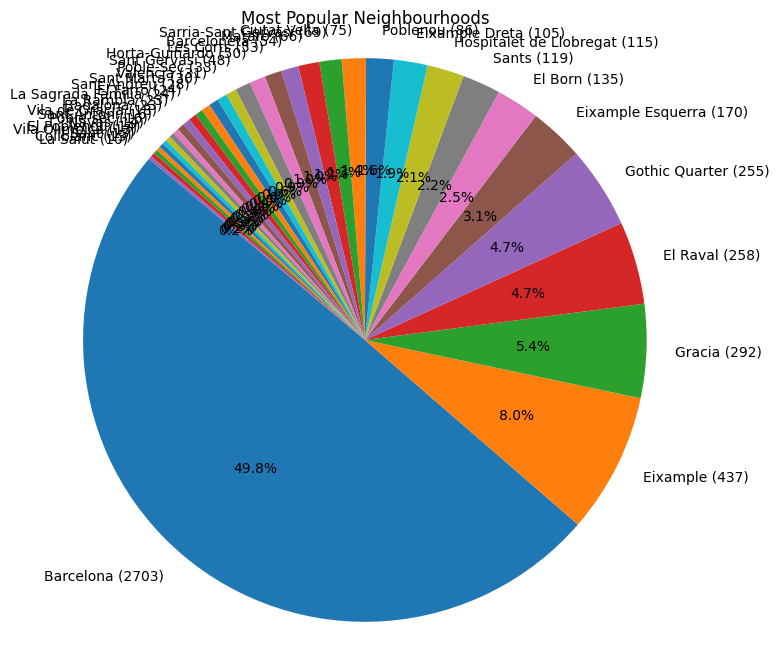

In [193]:
counts = bcn_rent_df['Specific Location'].value_counts()
x = 10
counts_filtered = counts[counts >= x]
labels = [f"{neighborhood} ({count})" for neighborhood, count in counts_filtered.items()]
plt.figure(figsize=(8, 8))
plt.pie(counts_filtered, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Most Popular Neighbourhoods')
plt.axis('equal')
plt.show()

### Correlation Analysis

Correlation Coefficient between Area and Price: -0.10406506229713292


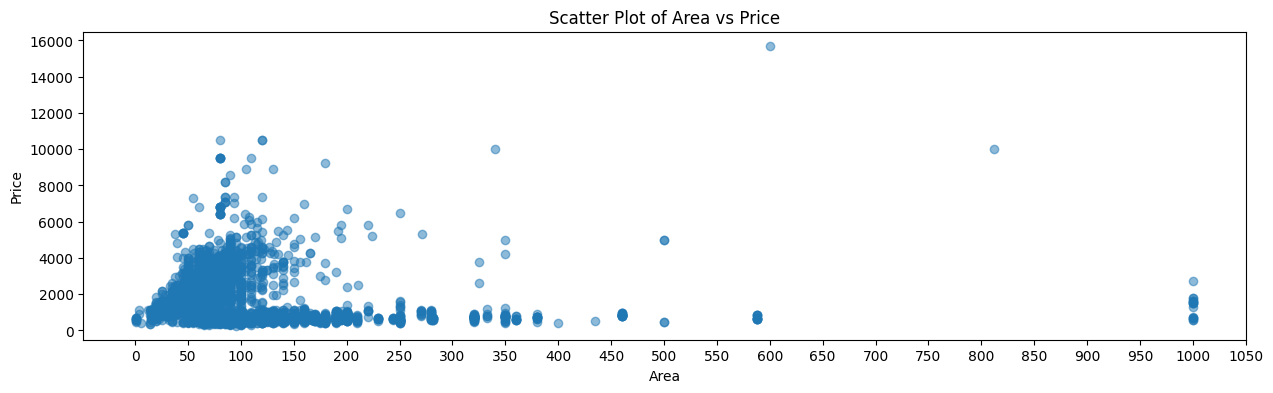

In [288]:
price_area_cleaned = bcn_rent_df.dropna(subset=['Area', 'Average Price'])
price_area_cleaned_sorted = price_area_cleaned.sort_values(by='Area')
correlation_coefficient = price_area_cleaned_sorted['Area'].corr(price_area_cleaned_sorted['Average Price'])

print("Correlation Coefficient between Area and Price:", correlation_coefficient)

plt.figure(figsize=(15, 4))
plt.scatter(price_area_cleaned_sorted['Area'], price_area_cleaned_sorted['Average Price'], alpha=0.5)
plt.xticks(range(0, 1100, 50))
plt.title('Scatter Plot of Area vs Price')
plt.xlabel('Area', rotation=0)
plt.ylabel('Price')
plt.show()

OBS.: The price doesn't seem to be that highly correlated with area. This is probably due to the influence of the properties' location. As studios can have a higher monthly rent that larger apartments if they are more center-located.

Correlation Coefficient between NºBedrooms and Price: 0.3850237019960357


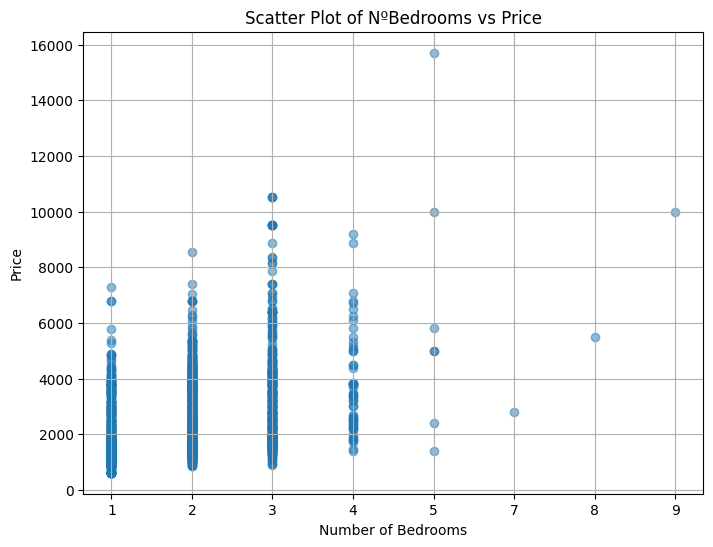

In [232]:
price_bed_cleaned = bcn_rent_df.dropna(subset=['Bedrooms', 'Average Price'])
price_bed_cleaned_sorted = price_bed_cleaned.sort_values(by='Bedrooms')
correlation_coefficient = price_bed_cleaned_sorted['Bedrooms'].corr(price_bed_cleaned_sorted['Average Price'])

print("Correlation Coefficient between NºBedrooms and Price:", correlation_coefficient)

plt.figure(figsize=(8, 6))
plt.scatter(price_bed_cleaned_sorted['Bedrooms'], price_bed_cleaned_sorted['Average Price'], alpha=0.5)
plt.title('Scatter Plot of NºBedrooms vs Price')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price')
plt.grid(True)
plt.show()

## K-means Clustering on Property Features and Neighborhoods

In [167]:
property_features = bcn_rent_df[['Average Price', 'Area', 'Bedrooms', 'Bathrooms']]
property_features_clean = property_features.dropna(subset=['Average Price', 'Area', 'Bedrooms', 'Bathrooms'])
X = property_features_clean[['Average Price', 'Area', 'Bedrooms', 'Bathrooms']]

X['Average Price'] = X['Average Price'].astype(int)
X['Area'] = X['Area'].astype(int)
X['Bedrooms'] = X['Bedrooms'].astype(int)
X['Bathrooms'] = X['Bathrooms'].astype(int)

X_scaled = (X - X.mean()) / X.std()

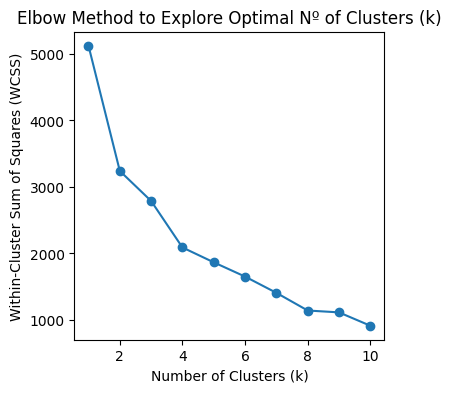

In [178]:
k_values = range(1, 11)
wcss_values = []

for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X_scaled)
    wcss_values.append(kmeans.inertia_)

plt.figure(figsize=(4, 4))
plt.plot(k_values, wcss_values, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method to Explore Optimal Nº of Clusters (k)')
plt.show()

In [169]:
k = 4
kmeans = KMeans(n_clusters=k, random_state=42)
X['Cluster'] = kmeans.fit_predict(X_scaled)

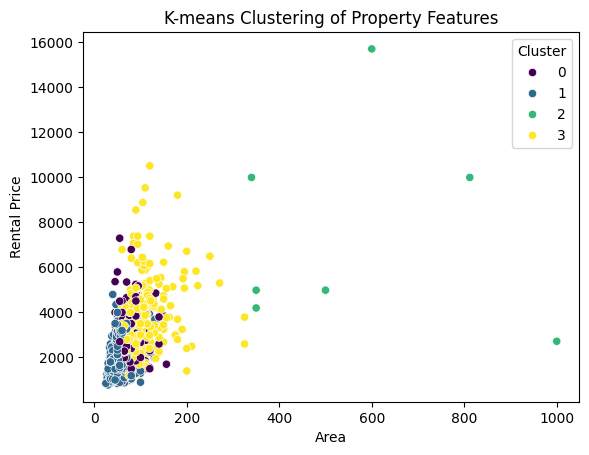

In [170]:
sns.scatterplot(x='Area', y='Average Price', hue='Cluster', data=X, palette='viridis')
plt.title('K-means Clustering of Property Features')
plt.xlabel('Area')
plt.ylabel('Rental Price')
plt.show()

OBS.: We can infer that C1 has the lowest rental prices and area, C3 has the highest rental prices and area and C0 is in between. C2 is small, sparse and scant so it will not be considered.

In [269]:
neighborhood_info = bcn_rent_df['Specific Location']
X_neighborhood = X.join(neighborhood_info)

In [270]:
X_neighborhood_counts = X_neighborhood['Specific Location'].value_counts()
neighborhoods_common = X_neighborhood_counts[X_neighborhood_counts >= 20].index
filtered_X_neighborhood = X_neighborhood[X_neighborhood['Specific Location'].isin(neighborhoods_common)]

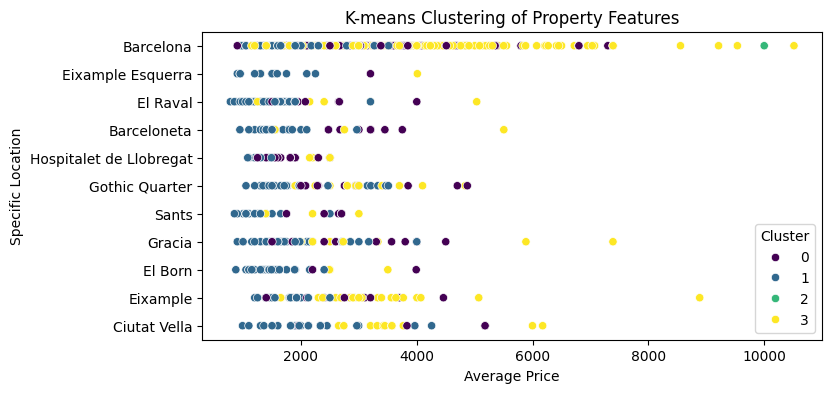

In [173]:
plt.figure(figsize=(8, 4))
sns.scatterplot(x='Average Price', y='Specific Location', hue='Cluster', data=filtered_X_neighborhood, palette='viridis')
plt.title('K-means Clustering of Property Features')
plt.xlabel('Average Price')
plt.ylabel('Specific Location')
plt.show()

OBS.: We can observe a higher presence of C3 (higher rental prices and increased area) in Barcelona and Eixample. However, it becomes quite hard to differentiate neighborhoods in the remaining clusters.

In [271]:
cluster_neighborhood_counts = filtered_X_neighborhood.groupby(['Cluster', 'Specific Location']).size().reset_index(name='Counts')

cluster_neighborhood_counts['Percentage'] = (cluster_neighborhood_counts['Counts'] /
                                             cluster_neighborhood_counts.groupby('Cluster')['Counts'].transform('sum')) * 100
cluster_neighborhood_counts

,Cluster,Specific Location,Counts,Percentage
0,0,Barcelona,165,64.453125
1,0,Barceloneta,8,3.125000
2,0,Ciutat Vella,4,1.562500
3,0,Eixample,10,3.906250
4,0,Eixample Esquerra,1,0.390625
5,0,El Born,2,0.781250
6,0,El Raval,10,3.906250
7,0,Gothic Quarter,15,5.859375
8,0,Gracia,12,4.687500
9,0,Hospitalet de Llobregat,23,8.984375


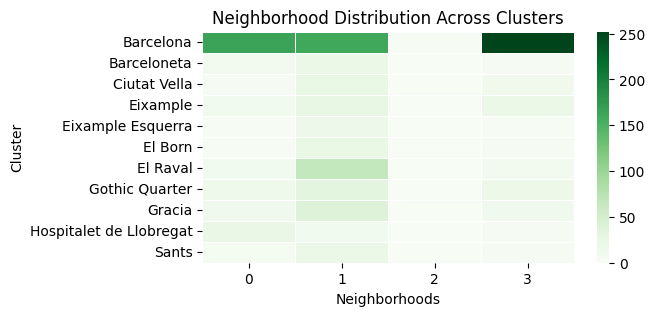

In [184]:
heatmap_data = cluster_neighborhood_counts.pivot(index='Cluster', columns='Specific Location', values='Counts').fillna(0)
heatmap_data_flipped = heatmap_data.transpose()

plt.figure(figsize=(6, 3))
sns.heatmap(heatmap_data_flipped, cmap='Greens', fmt='.0f', linewidths=.5)
plt.title('Neighborhood Distribution Across Clusters')
plt.xlabel('Neighborhoods')
plt.ylabel('Cluster')
plt.show()

OBS.: Here it becomes easier to tell that C1, with lower prices and area, has a higher distribution in Barcelona, El Raval and Gracia. Unfortunately, almost half of the ads had no information of the specific neighborhoods on the title. As such, it was expected that 'Barcelona' would make up a high percentage of all clusters. It would be highly interesting to attain more concrete data on specific location. However, we can still explore this by removing 'Barcelona' from the selection.

In [272]:
cluster_neighborhood_counts_nobcn = cluster_neighborhood_counts[cluster_neighborhood_counts['Specific Location'] != 'Barcelona']
cluster_neighborhood_counts_nobcn

,Cluster,Specific Location,Counts,Percentage
1,0,Barceloneta,8,3.125000
2,0,Ciutat Vella,4,1.562500
3,0,Eixample,10,3.906250
4,0,Eixample Esquerra,1,0.390625
5,0,El Born,2,0.781250
6,0,El Raval,10,3.906250
7,0,Gothic Quarter,15,5.859375
8,0,Gracia,12,4.687500
9,0,Hospitalet de Llobregat,23,8.984375
10,0,Sants,6,2.343750


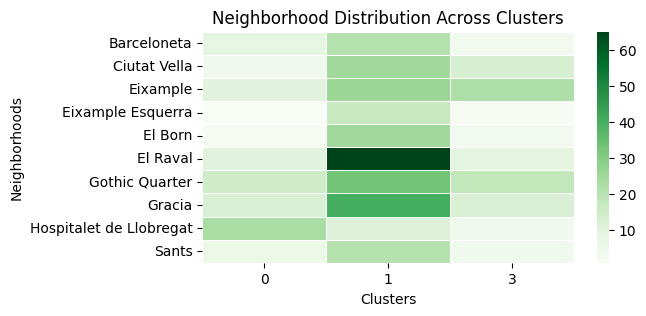

In [185]:
heatmap_data_nobcn = cluster_neighborhood_counts_nobcn.pivot(index='Cluster', columns='Specific Location', values='Counts').fillna(0)
heatmap_data_flipped_nobcn = heatmap_data_nobcn.transpose()

plt.figure(figsize=(6, 3))
sns.heatmap(heatmap_data_flipped_nobcn, cmap='Greens', fmt='.0f', linewidths=.5)
plt.title('Neighborhood Distribution Across Clusters')
plt.xlabel('Clusters')
plt.ylabel('Neighborhoods')
plt.show()

OBS.: After removing 'Barcelona' from the neighborhoods, it becomes easier to see a more distinct distribution. As inferred previously, C1 (lower rent, less area) has a higher distribution across different neighborhoods, with the most common ones being in El Raval, Gracia, Gothic Quarter, Eixample and Ciutat Vella. C3 (higher rent, more area) has more distribution in Eixample and Gothic Quarter. C0 (in between) in Hospitalet de Llobregat. Still having more specific information on the location of the properties defined as 'Barcelona' in general would be valuable to the analysis.

## Correlation between the soonest availability and monthly Rent

OBS.: The dataset contains information on the soonest availability for each property. This information is not so relevant for a market analysis, however, if a frequent web-scrapping would be done to retrieve changes in prices according to season, we could perform a time-series analysis to access how rental prices change over the seasons. However we can still run an analysis with the available info.

In [215]:
def date_format(row):
    """
    Format date
    :param row: row info
    :return: clean data format
    """
    row = row.strip()
    row = row.replace('From ', '')
    words = row.split()

    month_names = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
    if words[1] in month_names:
        month_numeric = str(month_names.index(words[1]) + 1).zfill(2)  # Get the month number and zero-pad it
        words[1] = month_numeric

    if len(words) < 3:
        words.append('2024')

    words = words[::-1]

    row = '-'.join(words)
    return row

bcn_rent_df['Available From'] = bcn_rent_df['Available From'].apply(lambda x: date_format(x))

In [221]:
bcn_rent_df['Available From'] = pd.to_datetime(bcn_rent_df['Available From'])
bcn_rent_df['Month'] = bcn_rent_df['Available From'].dt.month
bcn_rent_df['Year'] = bcn_rent_df['Available From'].dt.year

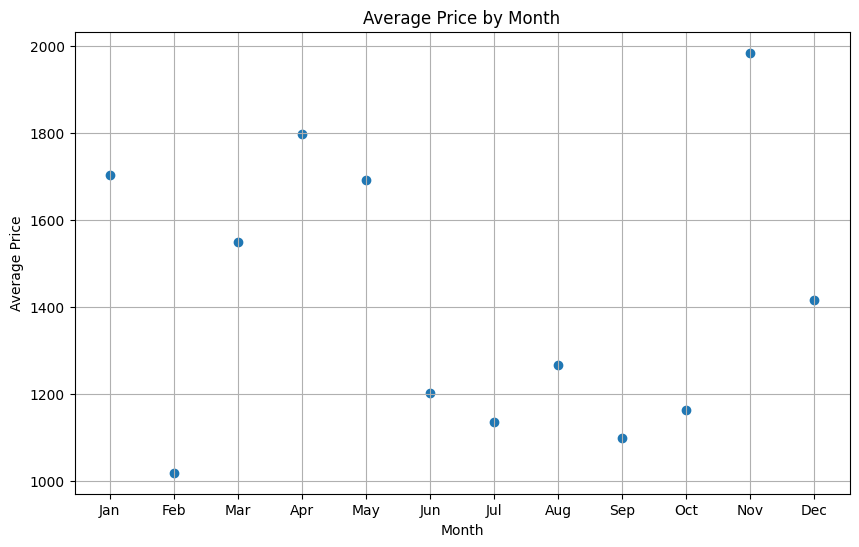

In [222]:
monthly_avg_price = bcn_rent_df.groupby('Month')['Average Price'].mean().reset_index()

plt.figure(figsize=(10, 6))
plt.scatter(monthly_avg_price['Month'], monthly_avg_price['Average Price'])
plt.title('Average Price by Month')
plt.xlabel('Month')
plt.ylabel('Average Price')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.show()

OBS.: Surprisingly, the high season (Jun, Jul, Aug, Sep, Oct) has the lowest average price. This could be because the information does not discriminate against year. Maybe a large portion of properties are already rented out for 2024 and because there is still more than a year to 2025, the prices can be lower.

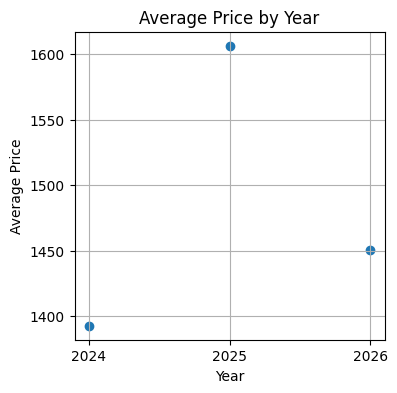

In [242]:
year_avg_price = bcn_rent_df.groupby('Year')['Average Price'].mean().reset_index()

plt.figure(figsize=(4, 4))
plt.scatter(year_avg_price['Year'], year_avg_price['Average Price'])
plt.title('Average Price by Year')
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.xticks(range(2024, 2027))  # Corrected x-ticks for the years 2024, 2025, and 2026
plt.grid(True)
plt.show()

OBS: It doesn't seem to be the case. As prices for 2025 are about 200€ higher. Let's discriminate against year and month.

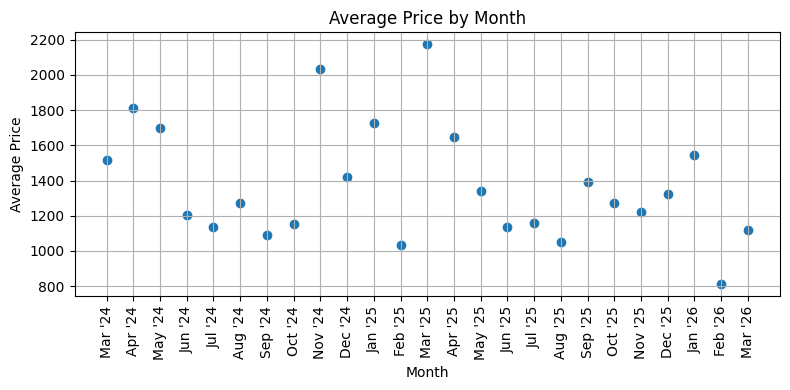

In [255]:
monthly_avg_price = bcn_rent_df.groupby(['Year', 'Month'])['Average Price'].mean().reset_index()

month_year_labels = [f"{pd.Timestamp(year, month, 1).strftime('%b')} '{str(year)[-2:]}" for year, month in zip(monthly_avg_price['Year'], monthly_avg_price['Month'])]

plt.figure(figsize=(8, 4))
plt.scatter(range(len(monthly_avg_price)), monthly_avg_price['Average Price'])
plt.title('Average Price by Month')
plt.xlabel('Month')
plt.ylabel('Average Price')
plt.xticks(range(len(monthly_avg_price)), month_year_labels, rotation=90)
plt.grid(True)
plt.tight_layout()
plt.show()

OBS.: The trends remains. Maybe the available properties for rent in high season are smaller?

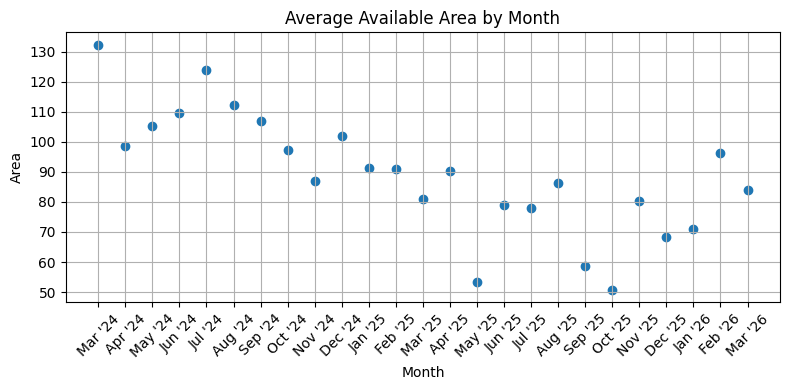

In [240]:
bcn_rent_df['Area'] = pd.to_numeric(bcn_rent_df['Area'], errors='coerce')
monthly_area = bcn_rent_df.groupby(['Year', 'Month'])['Area'].mean().reset_index()

plt.figure(figsize=(8, 4))
plt.scatter(range(len(monthly_area)), monthly_area['Area'])
plt.title('Average Available Area by Month')
plt.xlabel('Month')
plt.ylabel('Area')
plt.xticks(range(len(monthly_area)), month_year_labels, rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

OBS: This also doesn't seem to be the case. Could it be that there is a decrease in price due to a higher supply of rental properties, as people put up more properties for rent in summer?

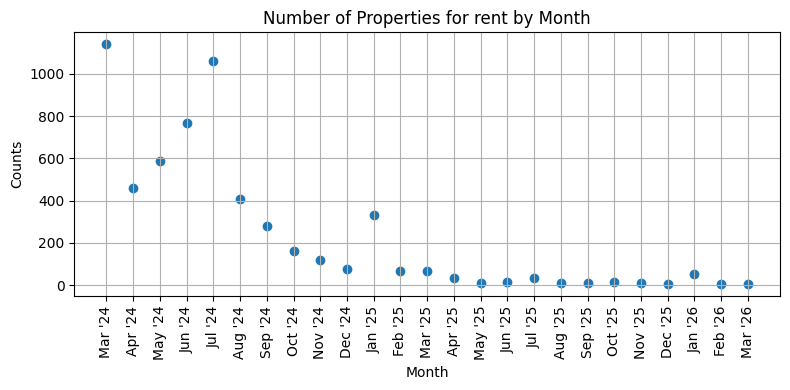

In [257]:
monthly_counts = bcn_rent_df.groupby(['Year', 'Month']).size().reset_index(name='Total_Counts')

plt.figure(figsize=(8, 4))
plt.scatter(range(len(monthly_counts)), monthly_counts['Total_Counts'])
plt.title('Number of Properties for rent by Month')
plt.xlabel('Month')
plt.ylabel('Counts')
plt.xticks(range(len(monthly_counts)), month_year_labels, rotation=90)
plt.grid(True)
plt.tight_layout()
plt.show()

OBS: We can confirm that the number of properties increases throughout the summer. Let's compare with price trends.

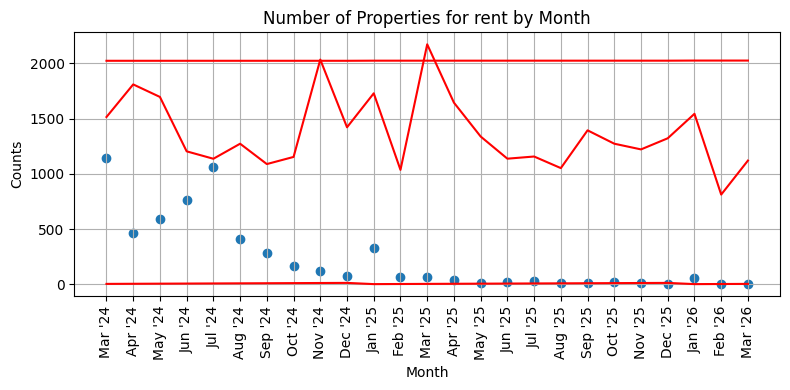

In [265]:
plt.figure(figsize=(8, 4))
plt.scatter(range(len(monthly_counts)), monthly_counts['Total_Counts'])
plt.title('Number of Properties for rent by Month')
plt.xlabel('Month')
plt.ylabel('Counts')
plt.xticks(range(len(monthly_counts)), month_year_labels, rotation=90)
plt.plot(monthly_avg_price, color='red', label='Average Price')
plt.grid(True)
plt.tight_layout()
plt.show()

OBS.: We can indeed indentify a correlation between increase in properties and a decrease in price for 2024's high season.